#MANE 4962 - Machine Learning Engineering<br>Initial Project<br>
Nicholas Schueler<br>
RIN: 662002091

In [ ]:
#Github URLS for all of the data
urlpay = 'https://raw.githubusercontent.com/neschuel/MLEProjectS24/main/data/payloads.csv'
urlpos = 'https://raw.githubusercontent.com/neschuel/MLEProjectS24/main/data/targetpositions.csv'
urlvel = 'https://raw.githubusercontent.com/neschuel/MLEProjectS24/main/data/targetvelocities.csv'
urlacc = 'https://raw.githubusercontent.com/neschuel/MLEProjectS24/main/data/targetaccelerations.csv'
urlcur = 'https://raw.githubusercontent.com/neschuel/MLEProjectS24/main/data/targetcurrents.csv'
urlerr = 'https://raw.githubusercontent.com/neschuel/MLEProjectS24/main/data/errorpositions.csv'

In [ ]:
#load the data into pandas data frames
import pandas as pd
import numpy as np
dfpay = pd.read_csv(urlpay, encoding = 'unicode_escape')
dfpos = pd.read_csv(urlpos, encoding = 'unicode_escape')
dfvel = pd.read_csv(urlvel, encoding = 'unicode_escape')
dfacc = pd.read_csv(urlacc, encoding = 'unicode_escape')
dfcur = pd.read_csv(urlcur, encoding = 'unicode_escape')
dferr = pd.read_csv(urlerr, encoding = 'unicode_escape')

In [ ]:
#load the data frames into numpy arrays
arpay = dfpay.to_numpy()
arpos = dfpos.to_numpy()
arvel = dfvel.to_numpy()
aracc = dfacc.to_numpy()
arcur = dfcur.to_numpy()
arerr = dferr.to_numpy()

In [ ]:
#create the x and y data
x = np.hstack((arpay,arpos,arvel,aracc))#,arcur
y = np.mean(np.square(arerr),axis = 1).reshape(-1,1)
y2 = arerr

X has 19 features<br>
y has 6 features<br>
153638 total data points

In [ ]:
print(arerr.shape)

(153638, 6)


<Figure size 640x480 with 0 Axes>

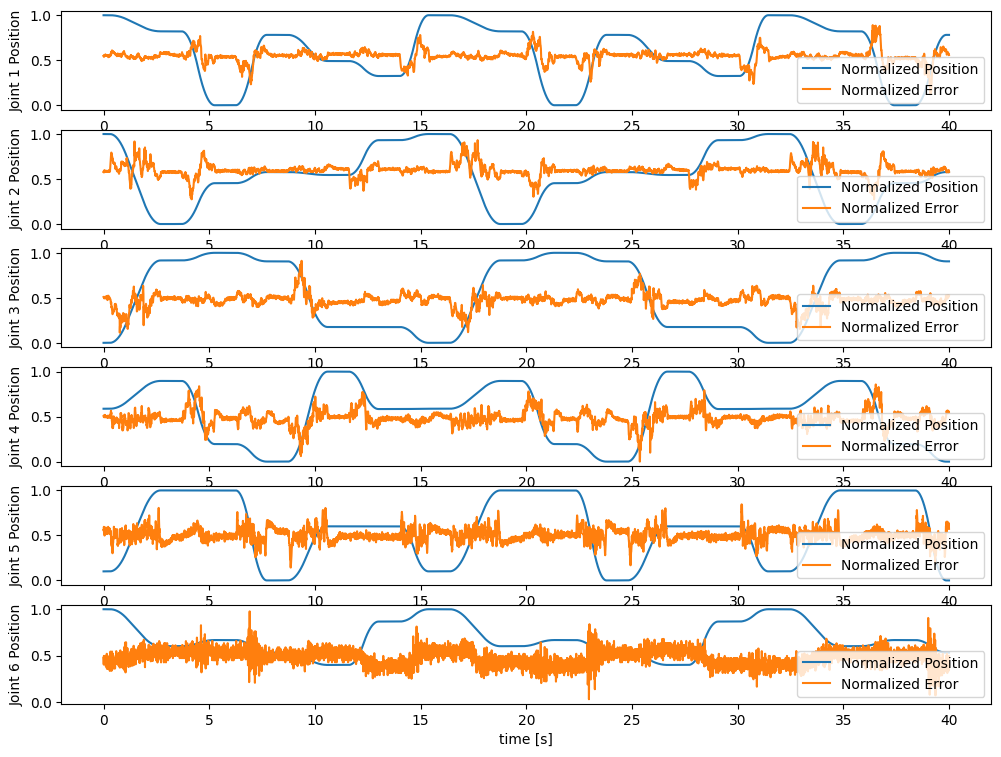

In [ ]:
#Visualize the dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
plt.figure()
#names = np.array(['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','boot'])
#was 8 11
f, axarr = plt.subplots(6,1,figsize=(12, 9))
lowb = 1000
uppb = 6000
tstep = 0.008
tarr = np.arange(0,(uppb-lowb)*tstep,tstep)
posscaler = MinMaxScaler()
errscaler = MinMaxScaler()
arposscaled = posscaler.fit_transform(arpos)
arerrscaled = errscaler.fit_transform(arerr)
#Plotting code taken from homework 4
for i in range(6):

  pos_to_be_plotted = arposscaled[lowb:uppb,i]
  err_to_be_plotted = arerrscaled[lowb:uppb,i]

  row = int(i)
  col = 0
  axarr[row].plot(tarr,pos_to_be_plotted)
  axarr[row].plot(tarr,err_to_be_plotted)
  axarr[row].set_xlabel('time [s]')
  axarr[row].set_ylabel('Joint '+str(i+1)+' Position')
  axarr[row].legend(['Normalized Position', 'Normalized Error'], loc='lower right')
  #axarr[row,col].title.set_text(names[i])

<Figure size 640x480 with 0 Axes>

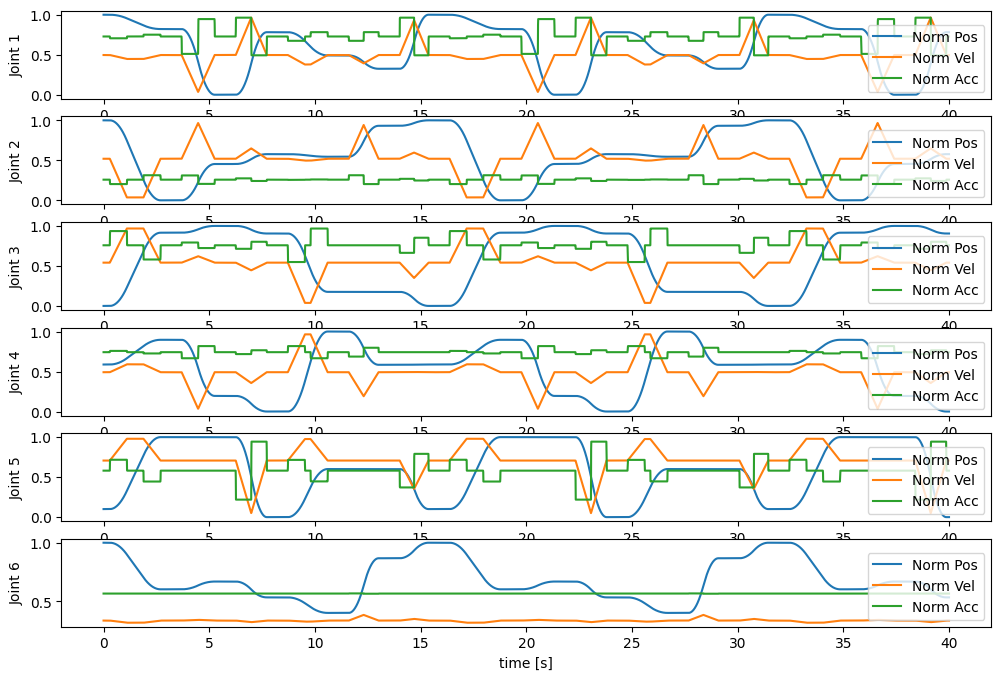

In [ ]:
#Visualize the dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
plt.figure()
#names = np.array(['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','boot'])
#width, height
f, axarr = plt.subplots(6,1,figsize=(12, 8))
lowb = 1000
uppb = 6000
tstep = 0.008
tarr = np.arange(0,(uppb-lowb)*tstep,tstep)
posscaler = MinMaxScaler()
velscaler = MinMaxScaler()
accscaler = MinMaxScaler()
arposscaled = posscaler.fit_transform(arpos)
arvelscaled = velscaler.fit_transform(arvel)
araccscaled = accscaler.fit_transform(aracc)
#Plotting code taken from homework 4
for i in range(6):

  pos_to_be_plotted = arposscaled[lowb:uppb,i]
  vel_to_be_plotted = arvelscaled[lowb:uppb,i]
  acc_to_be_plotted = araccscaled[lowb:uppb,i]

  row = int(i)
  col = 0
  axarr[row].plot(tarr,pos_to_be_plotted)
  axarr[row].plot(tarr,vel_to_be_plotted)
  axarr[row].plot(tarr,acc_to_be_plotted)
  axarr[row].set_xlabel('time [s]')
  axarr[row].set_ylabel('Joint '+str(i+1))
  axarr[row].legend(['Norm Pos', 'Norm Vel','Norm Acc'], loc='lower right')
  #axarr[row,col].title.set_text(names[i])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
y2scaler = MinMaxScaler()
x = xscaler.fit_transform(x)
y = yscaler.fit_transform(y)
y2  = y2scaler.fit_transform(y2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [ ]:
model = Sequential()
model.add(Dense(19,input_dim=19,activation='relu'))
model.add(Dense(19,activation='relu'))
#model.add(Dense(32,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(256,activation='relu'))
#model.add(Dense(512,activation='relu'))
#model.add(Dense(256,activation='relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(optimizer='adam',
            loss=mse)#,metrics=['accuracy']
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 16)                320       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 6)                 1

In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size=2048, validation_data=(x_test, y_test))

Epoch 1/200
53/53 [==============================] - 3s 12ms/step - loss: 2.7274 - val_loss: 2.3467
Epoch 2/200
53/53 [==============================] - 0s 6ms/step - loss: 2.1109 - val_loss: 1.9879
Epoch 3/200
53/53 [==============================] - 0s 5ms/step - loss: 1.6239 - val_loss: 1.5749
Epoch 4/200
53/53 [==============================] - 0s 5ms/step - loss: 1.4502 - val_loss: 1.4694
Epoch 5/200
53/53 [==============================] - 0s 5ms/step - loss: 1.3682 - val_loss: 1.4051
Epoch 6/200
53/53 [==============================] - 0s 5ms/step - loss: 1.3173 - val_loss: 1.3536
Epoch 7/200
53/53 [==============================] - 0s 5ms/step - loss: 1.2812 - val_loss: 1.3470
Epoch 8/200
53/53 [==============================] - 0s 5ms/step - loss: 1.2494 - val_loss: 1.3617
Epoch 9/200
53/53 [==============================] - 0s 6ms/step - loss: 1.2297 - val_loss: 1.2978
Epoch 10/200
53/53 [==============================] - 0s 5ms/step - loss: 1.1932 - val_loss: 1.2373
Epoch 11

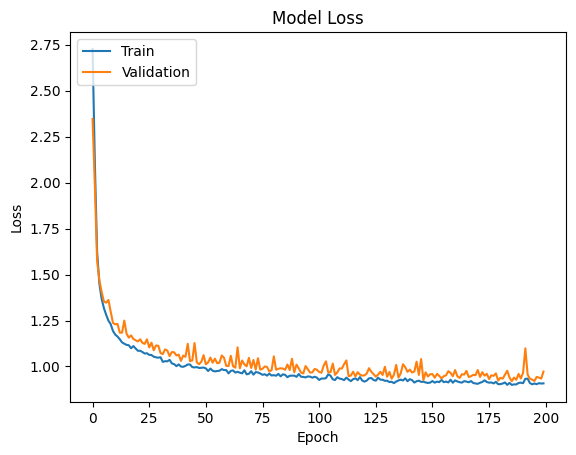

1441/1441 [==============================] - 2s 1ms/step


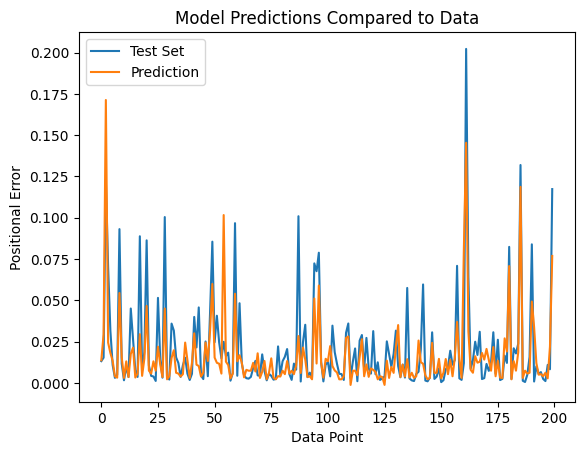

In [ ]:
import matplotlib.pyplot as plt
#Plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(y_test[200:400])
y_pred = model.predict(x_test)
plt.plot(y_pred[200:400])
plt.title('Model Predictions Compared to Data')
plt.ylabel('Positional Error')
plt.xlabel('Data Point')
plt.legend(['Test Set', 'Prediction'], loc='upper left')
plt.show()

#Plotting Accuracy
#import matplotlib.pyplot as plt
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Convolutional Model Accuracy - 10 Epochs')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

Using robot target position, velocity, and acceleration, the positional error is predicted using a deep neural network using the adam solver.<br>
Solving using a batch size of 2048 and 200 epochs, the solver converged on a  model loss value of around 1.06.<br>
The model was run on a sample of the test data set, and the peaks of the predictions generally match. This factor is important, as the model is intended to indicate robot configurations which will lead to high levels of error.

44/44 [==============================] - 0s 2ms/step


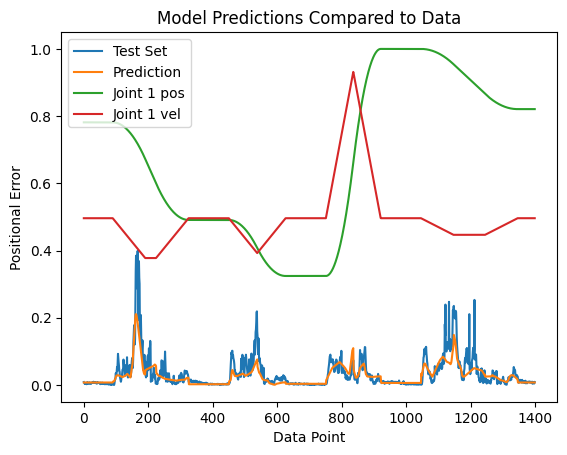

In [ ]:
import matplotlib.pyplot as plt
#Plotting Loss
lb=2000
ub = 3400
plt.plot(y[lb:ub])
y_pred2 = model.predict(x[lb:ub])
plt.plot(y_pred2)
plt.plot(x[lb:ub,1])
plt.plot(x[lb:ub,7])
plt.title('Model Predictions Compared to Data')
plt.ylabel('Positional Error')
plt.xlabel('Data Point')
plt.legend(['Test Set', 'Prediction','Joint 1 pos','Joint 1 vel'], loc='upper left')
plt.show()


In [ ]:
model2 = Sequential()
model2.add(Dense(19,input_dim=19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(32,activation='relu'))
#model2.add(Dense(64,activation='relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(256,activation='relu'))
#model.add(Dense(512,activation='relu'))
#model.add(Dense(256,activation='relu'))
#model2.add(Dense(128,activation='relu'))
#model2.add(Dense(64,activation='relu'))
#model2.add(Dense(32,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(6,activation='relu'))
model2.add(Dense(6))
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model2.compile(optimizer='adam',
            loss=mse)#,metrics=['accuracy']
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 19)                380       
                                                                 
 dense_61 (Dense)            (None, 19)                380       
                                                                 
 dense_62 (Dense)            (None, 32)                640       
                                                                 
 dense_63 (Dense)            (None, 16)                528       
                                                                 
 dense_64 (Dense)            (None, 16)                272       
                                                                 
 dense_65 (Dense)            (None, 16)                272       
                                                                 
 dense_66 (Dense)            (None, 16)               

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.3, random_state=12)

In [ ]:
history2 = model2.fit(x_train2, y_train2, epochs=200, batch_size=2048, validation_data=(x_test2, y_test2))

Epoch 1/200
53/53 [==============================] - 4s 21ms/step - loss: 297.0581 - val_loss: 141.8326
Epoch 2/200
53/53 [==============================] - 0s 8ms/step - loss: 84.3918 - val_loss: 39.4571
Epoch 3/200
53/53 [==============================] - 0s 7ms/step - loss: 22.7173 - val_loss: 12.4735
Epoch 4/200
53/53 [==============================] - 0s 8ms/step - loss: 10.4031 - val_loss: 9.4318
Epoch 5/200
53/53 [==============================] - 0s 7ms/step - loss: 9.3519 - val_loss: 9.2493
Epoch 6/200
53/53 [==============================] - 0s 9ms/step - loss: 9.2449 - val_loss: 9.1669
Epoch 7/200
53/53 [==============================] - 0s 7ms/step - loss: 9.1757 - val_loss: 9.1294
Epoch 8/200
53/53 [==============================] - 0s 8ms/step - loss: 9.1229 - val_loss: 9.0786
Epoch 9/200
53/53 [==============================] - 0s 8ms/step - loss: 9.0880 - val_loss: 9.0407
Epoch 10/200
53/53 [==============================] - 0s 8ms/step - loss: 9.0587 - val_loss: 9.0061

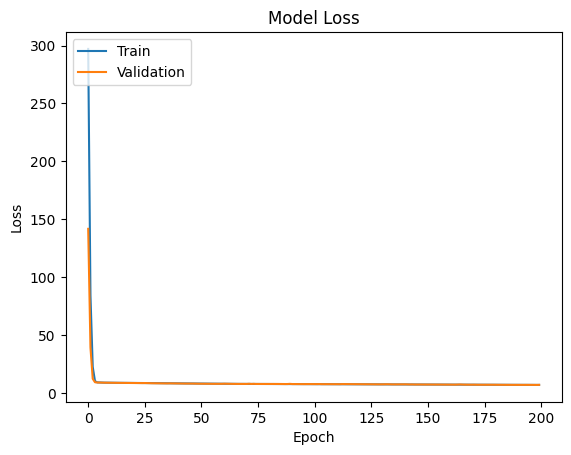

In [ ]:
import matplotlib.pyplot as plt
#Plotting Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


44/44 [==============================] - 0s 2ms/step


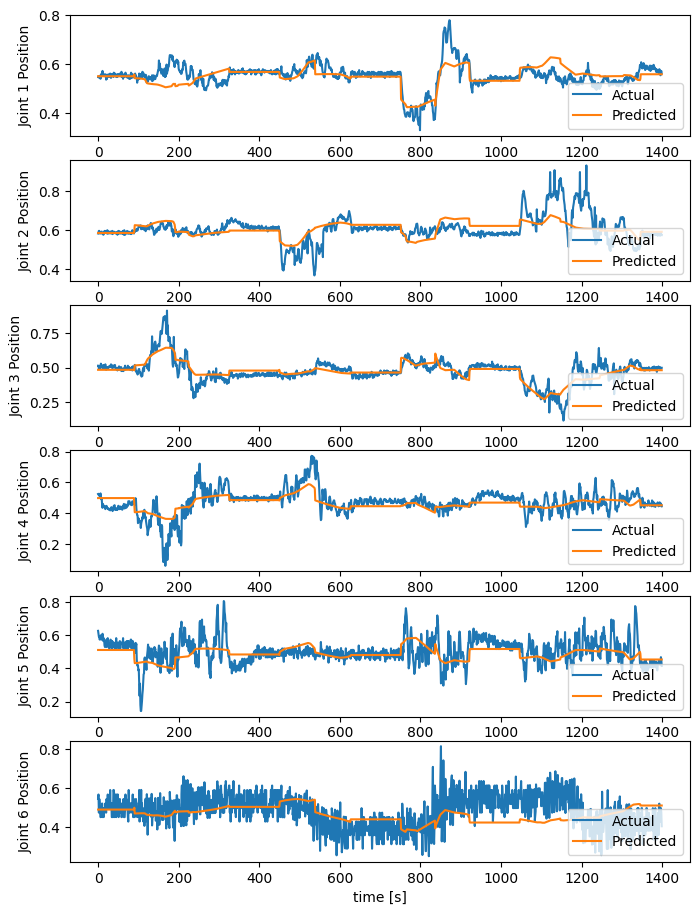

In [ ]:
import matplotlib.pyplot as plt
#Plotting Loss
lb=2000
ub = 3400
#plt.plot(y2[lb:ub,0])
#y_pred2 = model2.predict(x[lb:ub])
#y_pred3 = y_pred2[:,0]
#plt.plot(y_pred3)
#plt.plot(x[lb:ub,1])
#plt.plot(x[lb:ub,7])
#plt.title('Model Predictions Compared to Data')
#plt.ylabel('Positional Error')
#plt.xlabel('Data Point')
#plt.legend(['Test Set', 'Prediction','Joint 1 pos','Joint 1 vel'], loc='upper left')
#plt.show()

act_error = y2[lb:ub,:]
pred_error = model2.predict(x[lb:ub])
act_error = y2scaler.inverse_transform(act_error)
pred_error = y2scaler.inverse_transform(pred_error)

f, axarr = plt.subplots(6,1,figsize=(8, 11))

for i in range(6):

  act_err_to_be_plotted = act_error[:,i]
  pred_err_to_be_plotted = pred_error[:,i]

  row = int(i)
  col = 0
  axarr[row].plot(act_err_to_be_plotted)
  axarr[row].plot(pred_err_to_be_plotted)
  axarr[row].set_xlabel('time [s]')
  axarr[row].set_ylabel('Joint '+str(i+1)+' Position')
  axarr[row].legend(['Actual', 'Predicted'], loc='lower right')
  #axarr[row,col].title.set_text(names[i])
